## 產生 Python 腳本瀏覽 MOMO

In [1]:
! python -m playwright codegen --target python -o momo.py -b chromium https://www.momoshop.com.tw/

In [7]:
! python momo.py

【Apple 蘋果】iPhone 13 128G(6.1吋) 25,900
【Apple 蘋果】iPhone 13 256G(6.1吋) 28,288
【Apple 蘋果】iPhone 13 Pro 128G(6.1吋) 32,900
【Apple 蘋果】iPhone 13 Pro 256G(6.1吋) 36,400
【Apple 蘋果】iPhone 13 128G 25,900
【Apple 蘋果】iPhone 13 Pro Max 256G(6.7吋) 40,400
【Apple 蘋果】iPhone 13 Pro Max 128G(6.7吋) 36,900
【Apple 蘋果】iPhone 13 128G(6.1吋) 25,900
【Apple 蘋果】iPhone 13 Pro Max 256GB 40,400
【Apple 蘋果】iPhone 13 Pro 256G 36,400
【Apple 蘋果】iPhone 13 Pro Max 256G(6.7吋) 40,400
【Apple 蘋果】iPhone 13 256G(6.1吋) 28,288


In [ ]:
from playwright.sync_api import Playwright, sync_playwright
import time

def run(playwright: Playwright) -> None:
    browser = playwright.chromium.launch(headless=False)
    context = browser.new_context()

    # Open new page
    page = context.new_page()

    # Go to https://www.momoshop.com.tw/
    page.goto("https://www.momoshop.com.tw/")

    # Go to https://www.momoshop.com.tw/main/Main.jsp
    page.goto("https://www.momoshop.com.tw/main/Main.jsp")

    # Click [placeholder="請輸入關鍵字或品號"]
    page.click("[placeholder=\"請輸入關鍵字或品號\"]")

    # Fill [placeholder="請輸入關鍵字或品號"]
    page.fill("[placeholder=\"請輸入關鍵字或品號\"]", "iphone 13")

    # Click text=搜尋
    # with page.expect_navigation(url="https://www.momoshop.com.tw/search/searchShop.jsp?keyword=iphone%2013&searchType=1&curPage=1&_isFuzzy=0&showType=chessboardType"):
    with page.expect_navigation():
        page.click("text=搜尋")
    # assert page.url == "https://www.momoshop.com.tw/search/searchShop.jsp?keyword=iphone%2013"
    time.sleep(5)
    page.screenshot(path='momo.jpg', full_page = True)
    # Close page
    page.close()

    # ---------------------
    context.close()
    browser.close()


with sync_playwright() as playwright:
    run(playwright)


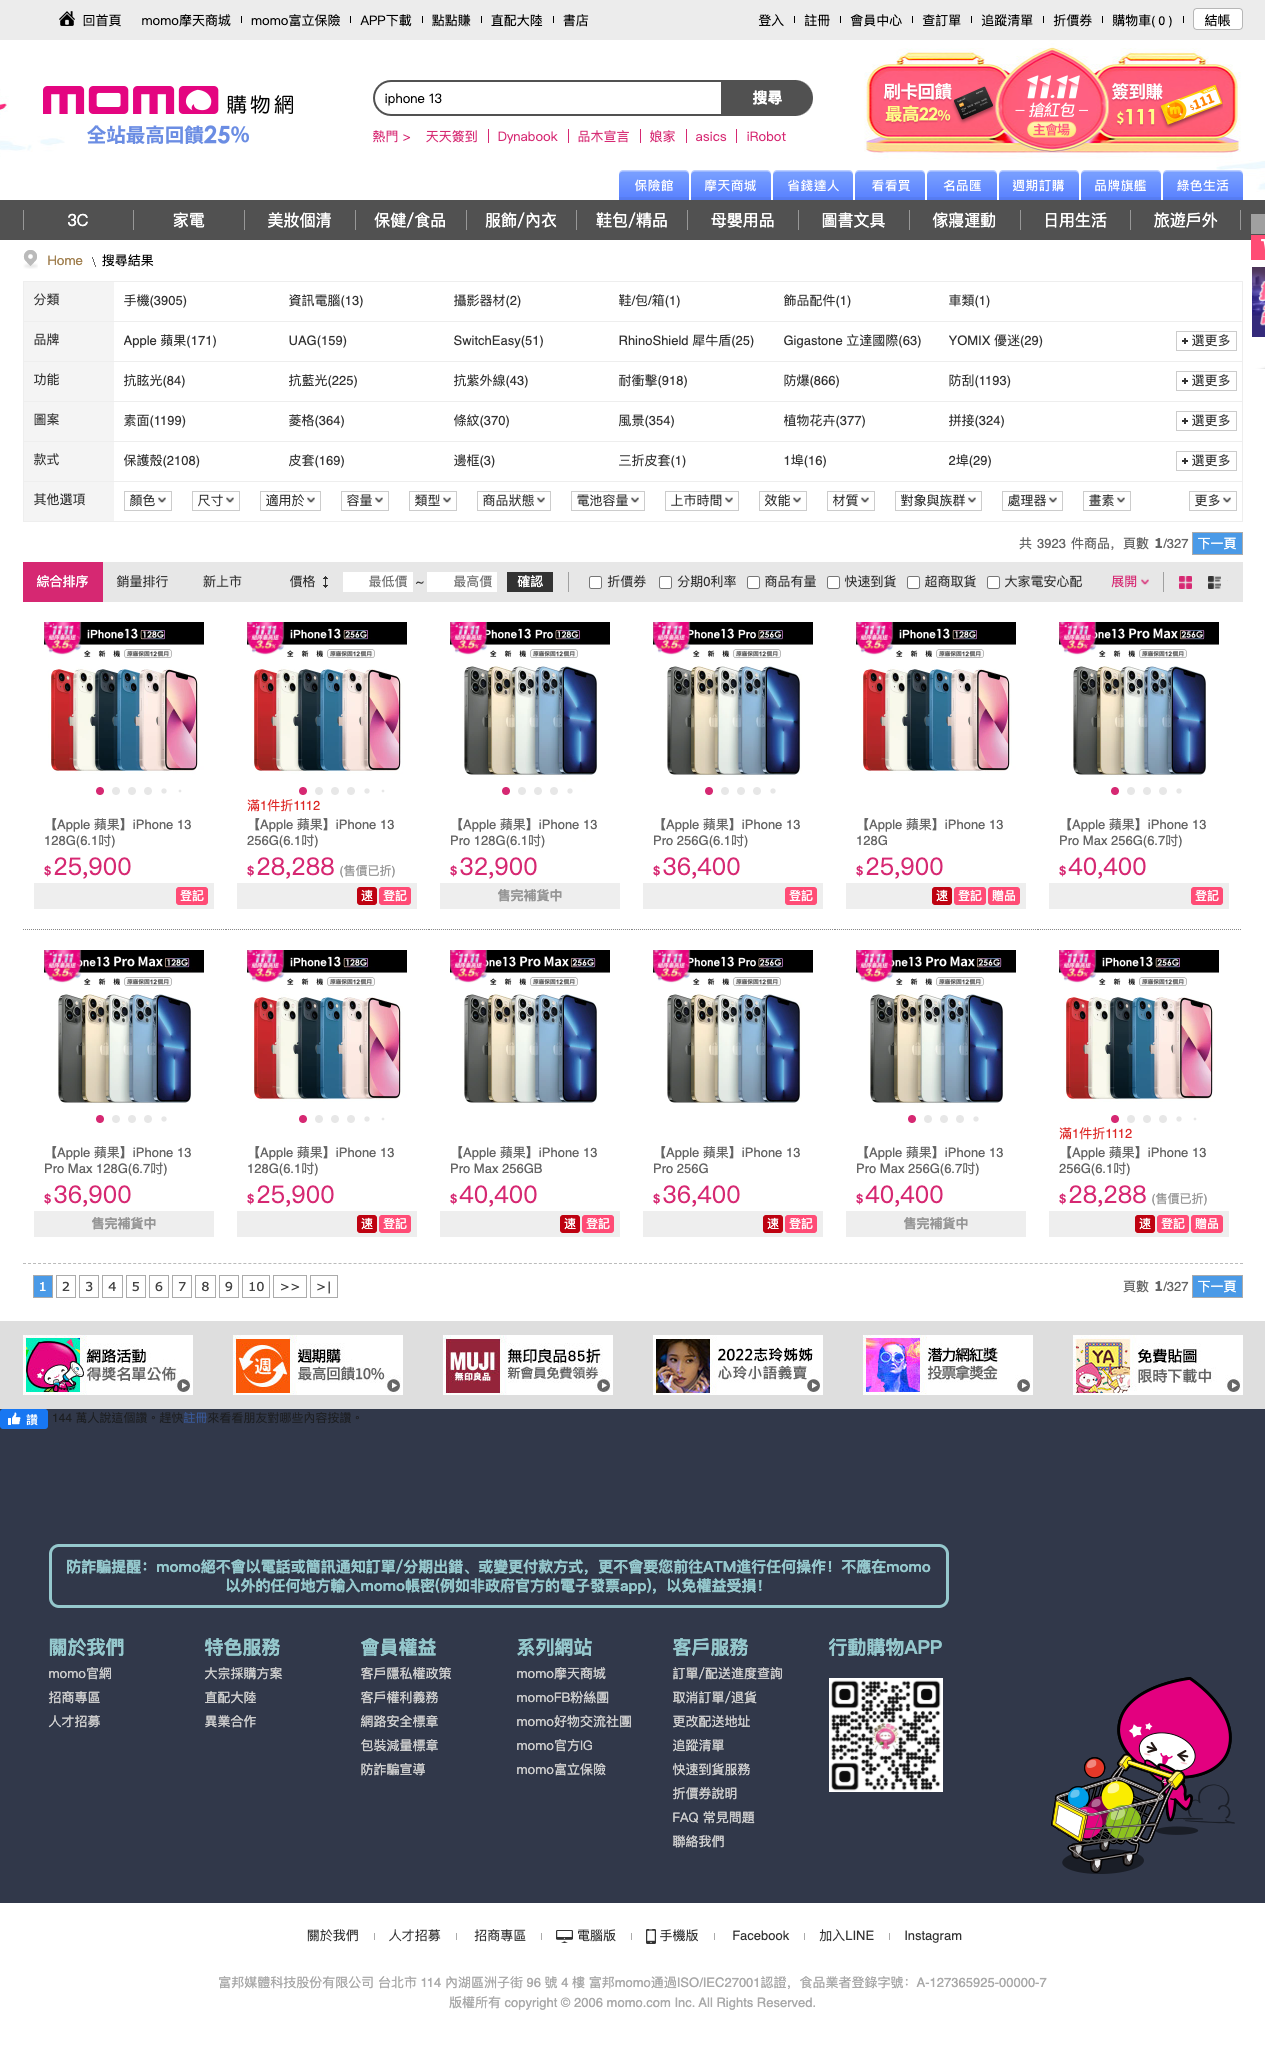

In [5]:
from PIL import Image
Image.open('momo.jpg')

In [ ]:
from playwright.sync_api import Playwright, sync_playwright
from bs4 import BeautifulSoup
import time

def run(playwright: Playwright) -> None:
    browser = playwright.chromium.launch(headless=False)
    context = browser.new_context()

    # Open new page
    page = context.new_page()

    # Go to https://www.momoshop.com.tw/
    page.goto("https://www.momoshop.com.tw/")

    # Go to https://www.momoshop.com.tw/main/Main.jsp
    page.goto("https://www.momoshop.com.tw/main/Main.jsp")

    # Click [placeholder="請輸入關鍵字或品號"]
    page.click("[placeholder=\"請輸入關鍵字或品號\"]")

    # Fill [placeholder="請輸入關鍵字或品號"]
    page.fill("[placeholder=\"請輸入關鍵字或品號\"]", "iphone 13")

    # Click text=搜尋
    # with page.expect_navigation(url="https://www.momoshop.com.tw/search/searchShop.jsp?keyword=iphone%2013&searchType=1&curPage=1&_isFuzzy=0&showType=chessboardType"):
    with page.expect_navigation():
        page.click("text=搜尋")
    # assert page.url == "https://www.momoshop.com.tw/search/searchShop.jsp?keyword=iphone%2013"
    time.sleep(5)
    soup = BeautifulSoup(page.content(), 'lxml')
    for li in soup.select('.listArea li'):
        prdname = li.select_one('.prdName').text.strip()
        price = li.select_one('.price > b').text.strip()
        print(prdname, price)
    #page.screenshot(path='momo.jpg', full_page = True)
    # Close page
    page.close()

    # ---------------------
    context.close()
    browser.close()


with sync_playwright() as playwright:
    run(playwright)
